<a href="https://colab.research.google.com/github/prasunpankaj/100-plus-Python-programming-exercises-extended/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.67955503 0.67396801 0.56070383]
data>>>>>>>>>>>>> [  0.49671415   0.35844985   1.00613839   2.52916825   2.29501487
   2.06087791   3.64009073   4.40752546   3.93805107   4.48061112
   4.01719342   3.55146367   3.79342594   1.8801457    0.15522787
  -0.40705966  -1.41989078  -1.10564345  -2.01366753  -3.42597123
  -1.96032246  -2.18609876  -2.11857056  -3.54331874  -4.08770147
  -3.97677888  -5.12777245  -4.75207444  -5.35271313  -5.64440688
  -6.24611349  -4.3938353   -4.40733253  -5.46504346  -4.64249854
  -5.86334219  -5.6544786   -7.61414872  -8.94233477  -8.74547354
  -8.00700696  -7.83563868  -7.95128696  -8.25239065  -9.73091264
 -10.45075685 -10.91139562  -9.8542734   -9.51065511 -11.27369526
 -10.94961129 -11.33469357 -12.01161557 -11.39993929 -10.36893976
  -9.43765964 -10.27687717 -10.58608954 -10.25482611  -9.27928098
  -9.75845522  -9.9441142  -11.05044917 -12.2466558  -11.43412997
 -10.07788995 -10.14990007  -9.14636717  -8.78473114  -9.4298509
  -9.06845529  -7.530418

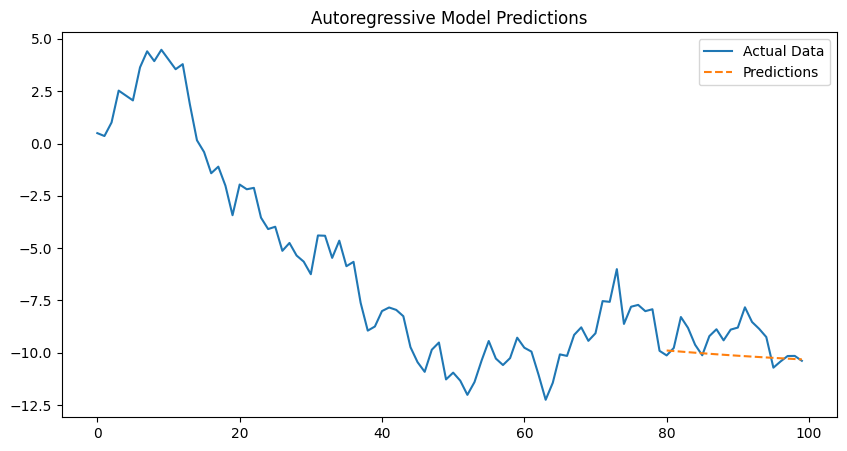

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate synthetic time-series data
print(np.random.rand(3))
np.random.seed(42)
n = 100
data = np.cumsum(np.random.randn(n))  # Random walk data
print(f"data>>>>>>>>>>>>>",data)
print("end data>>>>>>>>>>>>>")

# Split data into train & test
train, test = data[:80], data[80:]
print(f"train >>>>>>>.",train)
print(f"test >>>>>>>",test)

# Fit Autoregressive Model (AR)
model = AutoReg(train, lags=3)  # Using past 3 values
model_fit = model.fit()

# Predict future values
predictions = model_fit.predict(start=len(train), end=len(data)-1)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(data, label="Actual Data")
plt.plot(range(80, 100), predictions, label="Predictions", linestyle="dashed")
plt.legend()
plt.title("Autoregressive Model Predictions")
plt.show()


Text Processing – Tokenization, Vocabulary Building, N-grams, and **Perplexity** **bold text** **bold text**

In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download("punkt")
nltk.download('punkt_tab')

text = "Hello! How are you? I hope you're doing well."

# Sentence Tokenization
print(sent_tokenize(text))
# Output: ['Hello!', 'How are you?', "I hope you're doing well."]

# Word Tokenization
print(word_tokenize(text))
# Output: ['Hello', '!', 'How', 'are', 'you', '?', 'I', 'hope', 'you', "'re", 'doing', 'well', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Hello!', 'How are you?', "I hope you're doing well."]
['Hello', '!', 'How', 'are', 'you', '?', 'I', 'hope', 'you', "'re", 'doing', 'well', '.']


Vocabulary **Building**

In [12]:
from collections import Counter

text = "Hello world! NLP is amazing. The world is full of possibilities."

# Tokenizing words
words = word_tokenize(text.lower())

# Creating vocabulary
vocab = Counter(words)
print(f"vocab>>>>>",vocab)


vocab>>>>> Counter({'world': 2, 'is': 2, '.': 2, 'hello': 1, '!': 1, 'nlp': 1, 'amazing': 1, 'the': 1, 'full': 1, 'of': 1, 'possibilities': 1})


In [18]:
from nltk.util import ngrams

text = "Attention mechanisms cannot be applied to the bidirectional RNN model."
tokens = word_tokenize(text.lower())

# Generate bigrams
bigrams = list(ngrams(tokens, 3))
print(bigrams)
# Output: [('the', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ...]


[('attention', 'mechanisms', 'can'), ('mechanisms', 'can', 'not'), ('can', 'not', 'be'), ('not', 'be', 'applied'), ('be', 'applied', 'to'), ('applied', 'to', 'the'), ('to', 'the', 'bidirectional'), ('the', 'bidirectional', 'rnn'), ('bidirectional', 'rnn', 'model'), ('rnn', 'model', '.')]


4. Perplexity (Measuring Language Model Performance)


In [21]:
import math
from collections import Counter

# Example sentence
sentence = "I love NLP and deep learning"
tokens = word_tokenize(sentence.lower())
print(f"tokens >>",tokens)

# Word frequencies
word_counts = Counter(tokens)
total_words = sum(word_counts.values())
print(f"total_words >>",total_words)


# Unigram Probability
probabilities = [word_counts[word] / total_words for word in tokens]
print(f"probabilities >>",probabilities)


# Compute Perplexity
perplexity = math.exp(-sum(math.log(p) for p in probabilities) / len(probabilities))
print("Perplexity:", perplexity)


tokens >> ['i', 'love', 'nlp', 'and', 'deep', 'learning']
total_words >> 6
probabilities >> [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
Perplexity: 5.999999999999998


In [28]:
import torch
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the last time step's output
        print(f"out >>>>>",out)
        return out

rnn = SimpleRNN(input_size=10, hidden_size=20, output_size=1)
rnn.forward(torch.randn(32, 10, 10))

out >>>>> tensor([[ 0.0283],
        [-0.1284],
        [ 0.2031],
        [ 0.3469],
        [ 0.3532],
        [ 0.3695],
        [ 0.0173],
        [ 0.1828],
        [ 0.4304],
        [ 0.2465],
        [ 0.2644],
        [ 0.0221],
        [ 0.0418],
        [ 0.2426],
        [ 0.1391],
        [ 0.2054],
        [ 0.3582],
        [ 0.3045],
        [ 0.2039],
        [ 0.3718],
        [ 0.1796],
        [ 0.1248],
        [ 0.4134],
        [ 0.2558],
        [ 0.4709],
        [ 0.0908],
        [ 0.3091],
        [ 0.3332],
        [ 0.0532],
        [ 0.0485],
        [ 0.2036],
        [ 0.0963]], grad_fn=<AddmmBackward0>)


tensor([[ 0.0283],
        [-0.1284],
        [ 0.2031],
        [ 0.3469],
        [ 0.3532],
        [ 0.3695],
        [ 0.0173],
        [ 0.1828],
        [ 0.4304],
        [ 0.2465],
        [ 0.2644],
        [ 0.0221],
        [ 0.0418],
        [ 0.2426],
        [ 0.1391],
        [ 0.2054],
        [ 0.3582],
        [ 0.3045],
        [ 0.2039],
        [ 0.3718],
        [ 0.1796],
        [ 0.1248],
        [ 0.4134],
        [ 0.2558],
        [ 0.4709],
        [ 0.0908],
        [ 0.3091],
        [ 0.3332],
        [ 0.0532],
        [ 0.0485],
        [ 0.2036],
        [ 0.0963]], grad_fn=<AddmmBackward0>)

In [31]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

lstm = SimpleLSTM(input_size=10, hidden_size=20, output_size=1)


In [32]:
class SimpleGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleGRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

gru = SimpleGRU(input_size=10, hidden_size=20, output_size=1)


Example (Using Word2Vec & Cosine Similarity in Python)
python
Copy
Edit


In [1]:
!pip install --upgrade numpy --quiet
!pip uninstall -y gensim
!pip install gensim --quiet
import gensim.downloader as api
from scipy.spatial.distance import cosine

# Load pre-trained word embeddings (Word2Vec)
word_vectors = api.load("word2vec-google-news-300")

# Get vector representation of words
king = word_vectors["king"]
queen = word_vectors["queen"]
man = word_vectors["man"]
woman = word_vectors["woman"]

# Compute Cosine Similarity
similarity_king_queen = 1 - cosine(king, queen)
similarity_man_woman = 1 - cosine(man, woman)

print(f"Similarity (King vs Queen): {similarity_king_queen}")
print(f"Similarity (Man vs Woman): {similarity_man_woman}")


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Similarity (King vs Queen): 0.6510956618655842
Similarity (Man vs Woman): 0.7664011835001016


In [11]:

import gensim
from gensim.models import KeyedVectors

# Load pre-trained GloVe model (you need to download it first)
glove_path = "/content/sample_data/glove6B/glove.6B.50d.txt"  # Example file, needs to be downloaded
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)

# Get vector for a word
word_vector = glove_model["good"]

# Find similar words
similar_words = glove_model.most_similar("good", topn=15)
print(similar_words)


[('better', 0.9284391403198242), ('really', 0.9220623970031738), ('always', 0.9165270924568176), ('sure', 0.903351366519928), ('something', 0.9014206528663635), ('think', 0.8982065320014954), ('way', 0.8953989744186401), ('thing', 0.894504964351654), ('little', 0.8941226005554199), ('very', 0.8919912576675415), ('lot', 0.8919610977172852), ('kind', 0.8917281627655029), ("'re", 0.888700544834137), ('definitely', 0.8831959962844849), ('enough', 0.8795995116233826)]


In [5]:
import torch
import torch.nn as nn

# Define a Deep RNN model
class DeepRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(DeepRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        out, _ = self.rnn(x)
        return out

# Example model with 3 layers
model = DeepRNN(input_size=10, hidden_size=20, num_layers=3)
print(model)


DeepRNN(
  (rnn): RNN(10, 20, num_layers=3, batch_first=True)
)


In [6]:
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BiRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, bidirectional=True, batch_first=True)

    def forward(self, x):
        out, _ = self.rnn(x)
        return out

# Example
model = BiRNN(input_size=10, hidden_size=20)
print(model)


BiRNN(
  (rnn): RNN(10, 20, batch_first=True, bidirectional=True)
)


In [14]:
import torch.nn as nn

# Define a Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_size, num_heads, hidden_size, num_layers):
        super(TransformerModel, self).__init__()
        self.transformer = nn.Transformer(d_model=input_size, nhead=num_heads, num_encoder_layers=num_layers)

    def forward(self, x):
        out = self.transformer(x, x)  # Self-attention
        return out

# Example model
model = TransformerModel(input_size=512, num_heads=8, hidden_size=2048, num_layers=6)
print(model)


TransformerModel(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn): MultiheadAttent

In [15]:
#Example: Sentiment Classification using LSTM

import torch
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SentimentLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # Binary Classification (Positive/Negative)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        return torch.sigmoid(self.fc(hidden[-1]))

# Example Model with 100D input embeddings
model = SentimentLSTM(input_size=100, hidden_size=50, num_layers=2)
print(model)


SentimentLSTM(
  (lstm): LSTM(100, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [16]:
from transformers import pipeline

# Load GPT-2 model for text generation
text_generator = pipeline("text-generation", model="gpt2")

# Predict the next word
output = text_generator("The weather today is", max_length=10)
print(output)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The weather today is quite cold, so my wife'}]


In [18]:
#Example: Machine Translation with Transformers (Hugging Face)


from transformers import pipeline

translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")

# Translate English to French
result = translator("How are you?")
print(result[0]['translation_text'])


Device set to use cpu


Comment allez-vous ?


In [ ]:
# prompt: Speech Recognition with Deep Learning

!pip install transformers --quiet
!pip install sentencepiece --quiet
!pip install sacremoses --quiet
!pip install --upgrade numpy --quiet
!pip uninstall -y gensim
!pip install gensim --quiet


In [25]:
!pip install SpeechRecognition

import speech_recognition as sr

# Initialize recognizer
recognizer = sr.Recognizer()

# Load audio file
with sr.AudioFile('/content/sample_data/audio/wave1.wav') as source:
    audio = recognizer.record(source)

# Convert speech to text
text = recognizer.recognize_google(audio)
print(text)


hello my name is pankaj person I am working in Reliance software as a senior manager I am working in health have jio


In [36]:
import torch
import torch.nn.functional as F

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]  # Dimension of key
    scores = torch.matmul(Q, K.T) / (d_k ** 0.5)  # Compute scaled dot-product
    weights = F.softmax(scores, dim=-1)  # Apply softmax
    return torch.matmul(weights, V)  # Weighted sum of values

# Example with random tensors
Q = torch.rand(3, 5)  # Query
K = torch.rand(3, 5)  # Key
V = torch.rand(3, 5)  # Value

output = scaled_dot_product_attention(Q, K, V)
print(output)


tensor([[0.4407, 0.5217, 0.3695, 0.5103, 0.5845],
        [0.4573, 0.5111, 0.3596, 0.5393, 0.5766],
        [0.4342, 0.5241, 0.3809, 0.5146, 0.5880]])


In [35]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = embed_size // num_heads

        # Linear layers for Query, Key, Value
        self.qkv_linear = nn.Linear(embed_size, embed_size * 3)
        self.out_linear = nn.Linear(embed_size, embed_size)

    def forward(self, x):
        batch_size, seq_length, embed_size = x.shape
        qkv = self.qkv_linear(x)  # Generate Q, K, V
        qkv = qkv.reshape(batch_size, seq_length, self.num_heads, 3 * self.head_dim)
        Q, K, V = torch.chunk(qkv, 3, dim=-1)

        # Compute attention scores
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_probs = torch.nn.functional.softmax(attn_scores, dim=-1)
        attn_output = torch.matmul(attn_probs, V)

        # Concatenate heads and pass through linear layer
        attn_output = attn_output.reshape(batch_size, seq_length, embed_size)
        return self.out_linear(attn_output)

# Example usage
embed_size = 64
num_heads = 16
x = torch.rand(2, 17, embed_size)  # Batch of 2, sequence of 10, embedding size 64
attention = MultiHeadAttention(embed_size, num_heads)
output = attention(x)
print(output.shape)  # Output shape: (2, 10, 64)


torch.Size([2, 17, 64])


In [38]:
!pip install mediapipe opencv-python numpy tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [39]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

mp_pose = mp.solutions.pose  # Load Mediapipe Pose Model
pose = mp_pose.Pose()


In [ ]:
def extract_keypoints(video_path):
    cap = cv2.VideoCapture(video_path)
    keypoints_list = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            keypoints = np.array([[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark]).flatten()
            keypoints_list.append(keypoints)

    cap.release()
    return np.array(keypoints_list)

# 📌 Example: Upload a sample video in Colab and extract keypoints
from google.colab import files
uploaded = files.upload()

video_path = list(uploaded.keys())[0]
keypoints = extract_keypoints(video_path)
print("Extracted Keypoints Shape:", keypoints.shape)


In [44]:
# Define Model
model = Sequential([
    LSTM(64, return_sequences=True, activation="relu", input_shape=(30, 99)),  # 99 keypoints per frame
    LSTM(64, return_sequences=False, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(5, activation="softmax")  # 5 exercise classes
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,253 (301.77 KB)

 Trainable params: 77,253 (301.77 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
exercise_labels = ["Push-up", "Squat", "Jumping Jack", "Running", "Plank"]

def predict_exercise(video_path):
    keypoints = extract_keypoints(video_path)
    keypoints = np.expand_dims(keypoints[:30], axis=0)  # Use 30 frames as input
    prediction = model.predict(keypoints)

    exercise = exercise_labels[np.argmax(prediction)]
    intensity = "High" if exercise in ["Running", "Jumping Jack"] else "Moderate"

    return {"Exercise": exercise, "Intensity": intensity}

# 📌 Example Prediction
video_path = list(uploaded.keys())[0]  # Use uploaded video
result = predict_exercise(video_path)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
{'Exercise': 'Squat', 'Intensity': 'Moderate'}


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

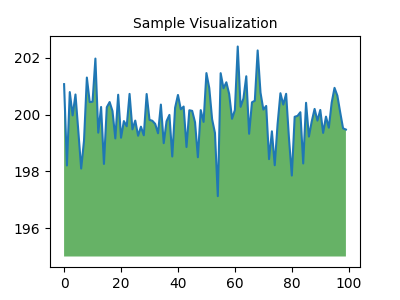

In [37]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
